# **Streamlined Insights: A Descriptive Analysis of TV Shows and Movies on Amazon Prime Video**



# Load and Understand the Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = '/amazon_prime_video.csv'
amazon_prime_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(amazon_prime_data.head())
print("\n")

# Display data types and non-null counts
print(amazon_prime_data.info())
print("\n")

# Seeing the number of missing values in the dataset
missing_values = amazon_prime_data.isnull().sum().sum()
print("Total missing values in the dataset:", missing_values)
print("\n")

# Display basic statistics
print(amazon_prime_data.describe())


  show_id   type                 title        director  \
0      s1  Movie   The Grand Seduction    Don McKellar   
1      s2  Movie  Take Care Good Night    Girish Joshi   
2      s3  Movie  Secrets of Deception     Josh Webber   
3      s4  Movie    Pink: Staying True  Sonia Anderson   
4      s5  Movie         Monster Maker    Giles Foster   

                                                cast         country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar           India   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   United States   
3  Interviews with: Pink, Adele, Beyoncé, Britney...   United States   
4  Harry Dean Stanton, Kieran O'Brien, George Cos...  United Kingdom   

       date_added  release_year rating duration                listed_in  \
0  March 30, 2021          2014    NaN  113 min            Comedy, Drama   
1  March 30, 2021          2018    13+  110 min     Drama, Interna

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Visualize Missing Values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


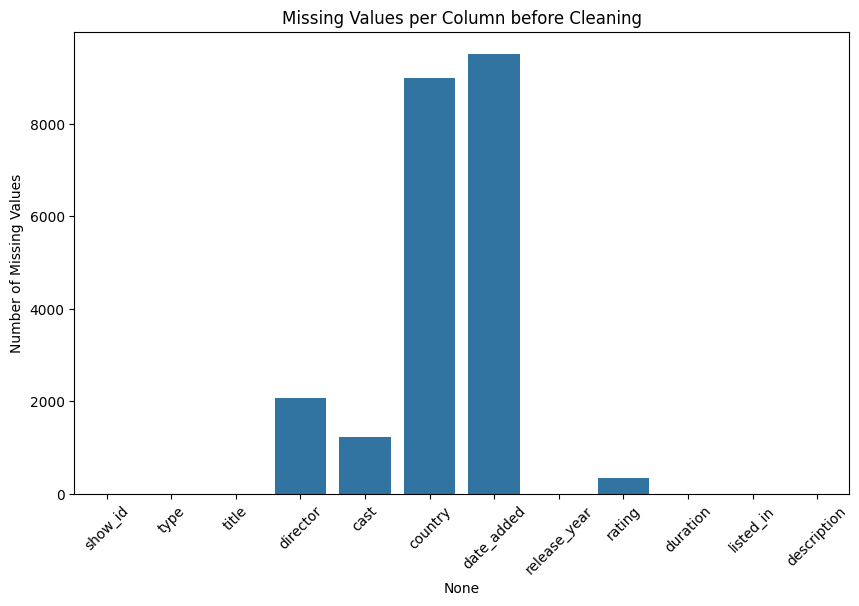

In [ ]:
# Check for missing values
missing_values_amazon = amazon_prime_data.isnull().sum()

# Visualize the missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_amazon.index, y=missing_values_amazon.values)
plt.title('Missing Values per Column before Cleaning')
plt.xticks(rotation=45)
plt.ylabel('Number of Missing Values')
plt.show()


# Filling missing values with mean or median

# Handling the 'duration' Column

In [ ]:
# Clean 'duration' column
amazon_prime_data['duration'] = amazon_prime_data['duration'].fillna('0 min')
amazon_prime_data['duration'] = amazon_prime_data['duration'].str.replace(' min', '').str.replace(' Season', 's').str.replace(' Seasons', 's')

# Separate 'duration' into 'duration_minutes' and 'duration_seasons'
amazon_prime_data['duration_minutes'] = amazon_prime_data['duration'].apply(lambda x: int(x) if 's' not in x else 0)
amazon_prime_data['duration_seasons'] = amazon_prime_data['duration'].apply(lambda x: int(x.replace('s', '')) if 's' in x else 0)

# Drop the original 'duration' column
amazon_prime_data.drop(columns=['duration'], inplace=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Dealing with missing values

In [ ]:
numerical_cols = ['duration_minutes', 'duration_seasons']

for col in numerical_cols:
    if col in amazon_prime_data.columns:
        amazon_prime_data[col].fillna(amazon_prime_data[col].median(), inplace=True)
    else:
        print(f"Column '{col}' not found in the dataset.")

# Check if there are any remaining missing values
print(amazon_prime_data.isnull().sum())


show_id                0
type                   0
title                  0
director            2083
cast                1233
country             8996
date_added          9513
release_year           0
rating               337
listed_in              0
description            0
duration_minutes       0
duration_seasons       0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-43-8abef2b60548>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amazon_prime_data[col].fillna(amazon_prime_data[col].median(), inplace=True)


# Filling missing value with unknown

In [ ]:
categorical_cols = ['director', 'cast', 'country', 'rating']
amazon_prime_data[categorical_cols] = amazon_prime_data[categorical_cols].fillna('Unknown')

# Check if there are any remaining missing values
print(amazon_prime_data.isnull().sum())


show_id                0
type                   0
title                  0
director               0
cast                   0
country                0
date_added          9513
release_year           0
rating                 0
listed_in              0
description            0
duration_minutes       0
duration_seasons       0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Dropping values

In [ ]:
# Drop rows with any missing values
amazon_prime_data.dropna(inplace=True)

# Check if there are any remaining missing values
print(amazon_prime_data.isnull().sum())


show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
listed_in           0
description         0
duration_minutes    0
duration_seasons    0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# visualizing after data cleaning

In [ ]:
# Check for missing values
missing_values = amazon_prime_data.isnull().sum()

# Visualize the missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.title('Missing Values per Column after Cleaning for Amazon Prime Video')
plt.xticks(rotation=45)
plt.ylabel('Number of Missing Values')
plt.show()

NameError: name 'amazon_prime_data' is not defined

# Distribution of Categorical variables

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-47-46e675ab001b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=amazon_prime_data, x='type', palette='viridis') # Changed amazon_data to amazon_prime_data
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/loca

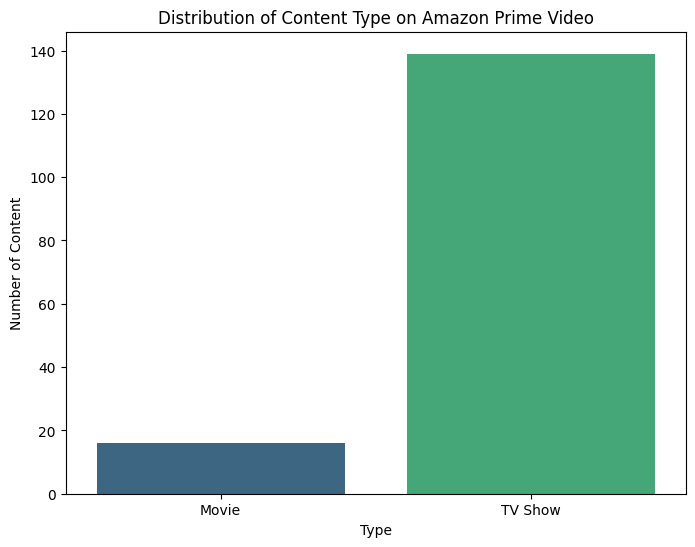

<ipython-input-47-46e675ab001b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=amazon_prime_data, x='rating', palette='coolwarm', order=amazon_prime_data['rating'].value_counts().index) # Changed amazon_data to amazon_prime_data
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to

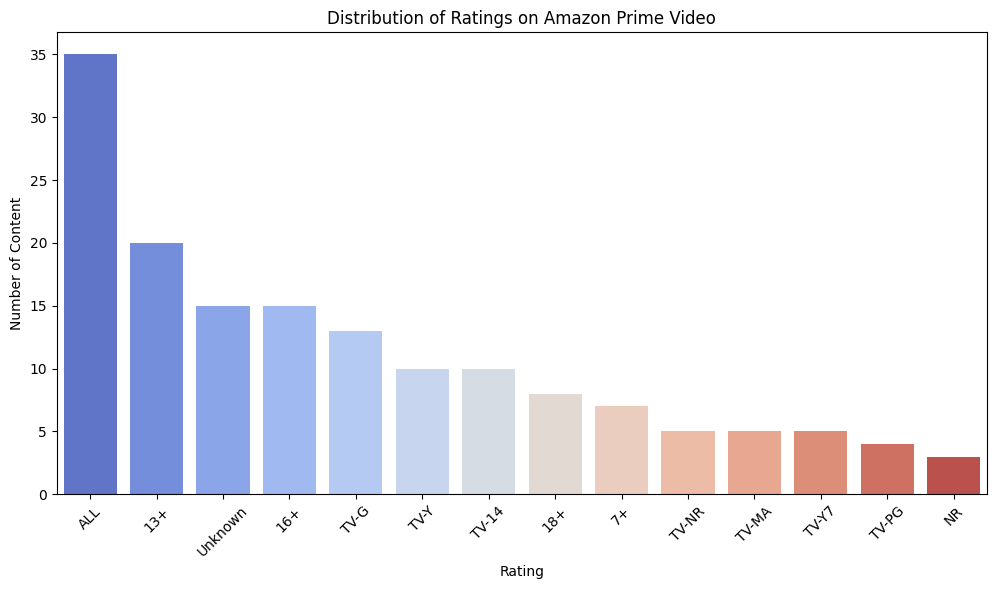

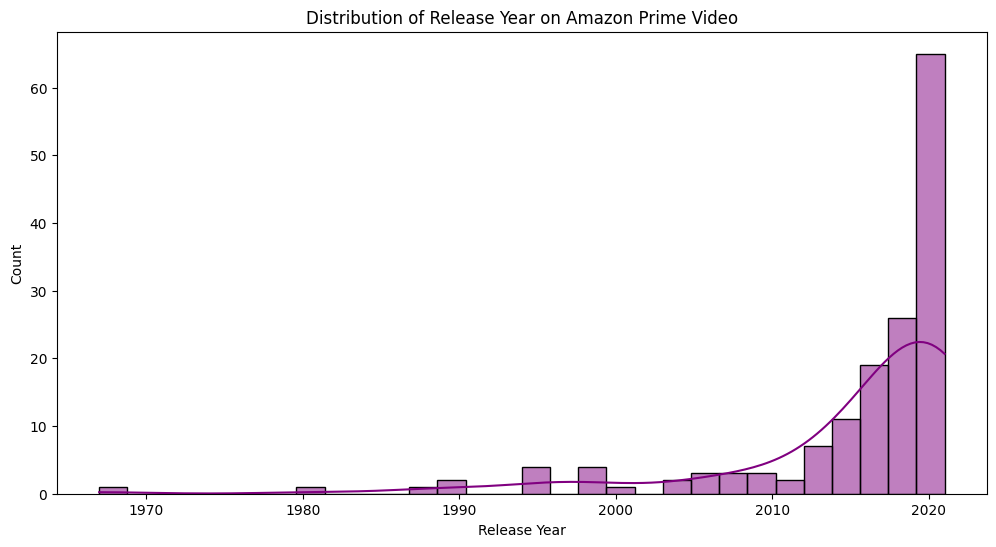

In [ ]:
# Distribution of content type
plt.figure(figsize=(8, 6))
sns.countplot(data=amazon_prime_data, x='type', palette='viridis')
plt.title('Distribution of Content Type on Amazon Prime Video')
plt.xlabel('Type')
plt.ylabel('Number of Content')
plt.show()

# Distribution of ratings
plt.figure(figsize=(12, 6))
sns.countplot(data=amazon_prime_data, x='rating', palette='coolwarm', order=amazon_prime_data['rating'].value_counts().index)
plt.title('Distribution of Ratings on Amazon Prime Video')
plt.xlabel('Rating')
plt.ylabel('Number of Content')
plt.xticks(rotation=45)
plt.show()

# Distribution of release year
plt.figure(figsize=(12, 6))
sns.histplot(amazon_prime_data['release_year'], bins=30, kde=True, color='purple')
plt.title('Distribution of Release Year on Amazon Prime Video')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

# Distribution of Numerical Variables

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


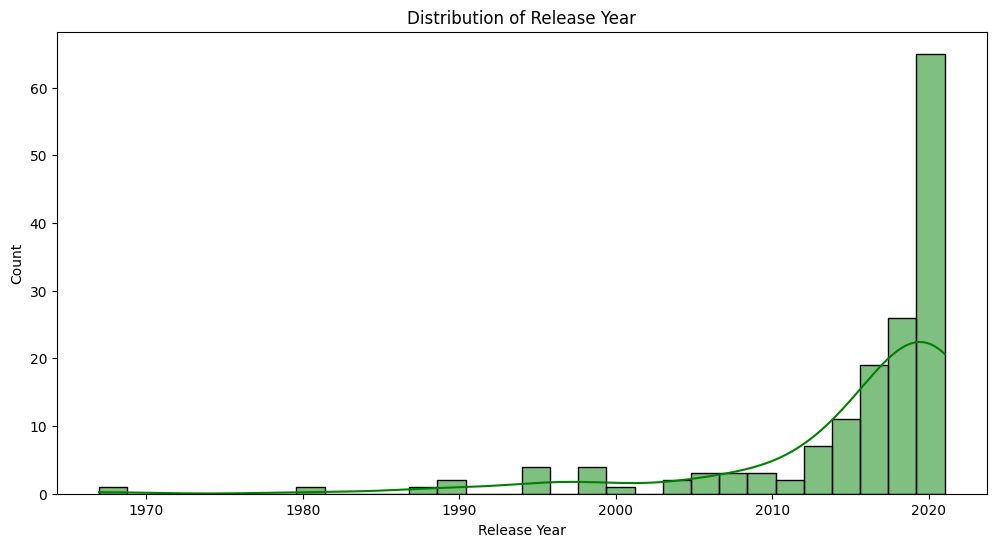

In [ ]:
# Distribution of release year for Amazon Prime Video TV shows and movies
plt.figure(figsize=(12, 6))
sns.histplot(amazon_prime_data['release_year'], bins=30, kde=True, color='green')
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

# Descriptive statistics for Numercial Variables

In [ ]:
# Summary statistics for numerical variables
print(amazon_prime_data[['release_year', 'duration_minutes', 'duration_seasons']].describe())

# Additional statistics for numerical variables
def additional_stats(df):
    stats = df.agg(['mean', 'median', 'std', 'var', 'skew', 'kurt']).T
    stats['iqr'] = df.quantile(0.75) - df.quantile(0.25)
    return stats

print(additional_stats(amazon_prime_data[['release_year', 'duration_minutes', 'duration_seasons']]))


       release_year  duration_minutes  duration_seasons
count    155.000000        155.000000        155.000000
mean    2015.341935          8.787097          2.754839
std        8.798936         27.052375          2.492435
min     1967.000000          0.000000          0.000000
25%     2014.000000          0.000000          2.000000
50%     2018.000000          0.000000          2.000000
75%     2021.000000          0.000000          3.000000
max     2021.000000        131.000000         15.000000
                         mean  median        std         var      skew  \
release_year      2015.341935  2018.0   8.798936   77.421282 -2.560937   
duration_minutes     8.787097     0.0  27.052375  731.831001  2.988325   
duration_seasons     2.754839     2.0   2.492435    6.212233  2.519394   

                      kurt  iqr  
release_year      7.786272  7.0  
duration_minutes  7.683497  0.0  
duration_seasons  8.061581  1.0  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Frequency tables for categorical variables
categorical_cols = ['type', 'rating', 'director', 'cast', 'country']

for col in categorical_cols:
    print(f"Frequency table for {col}:")
    print(amazon_prime_data[col].value_counts())
    print()


Frequency table for type:
type
TV Show    139
Movie       16
Name: count, dtype: int64

Frequency table for rating:
rating
ALL        35
13+        20
Unknown    15
16+        15
TV-G       13
TV-Y       10
TV-14      10
18+         8
7+          7
TV-NR       5
TV-MA       5
TV-Y7       5
TV-PG       4
NR          3
Name: count, dtype: int64

Frequency table for director:
director
Unknown                        139
Sonia Anderson                   2
Don McKellar                     1
Girish Joshi                     1
Josh Webber                      1
Giles Foster                     1
Paul Weiland                     1
Fran Strine                      1
Thomas Kail, Alex Rudzinski      1
Daniel Gilboy                    1
Robert Allan Ackerman            1
Justin G. Dyck                   1
Liz Tuccillo                     1
Dominique Rocher                 1
Jep Barcelona                    1
Becca Gleason                    1
Name: count, dtype: int64

Frequency table for cast:
ca

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Frequency Tables for Categorical Variables

# Box Plots for Outlier Detection

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


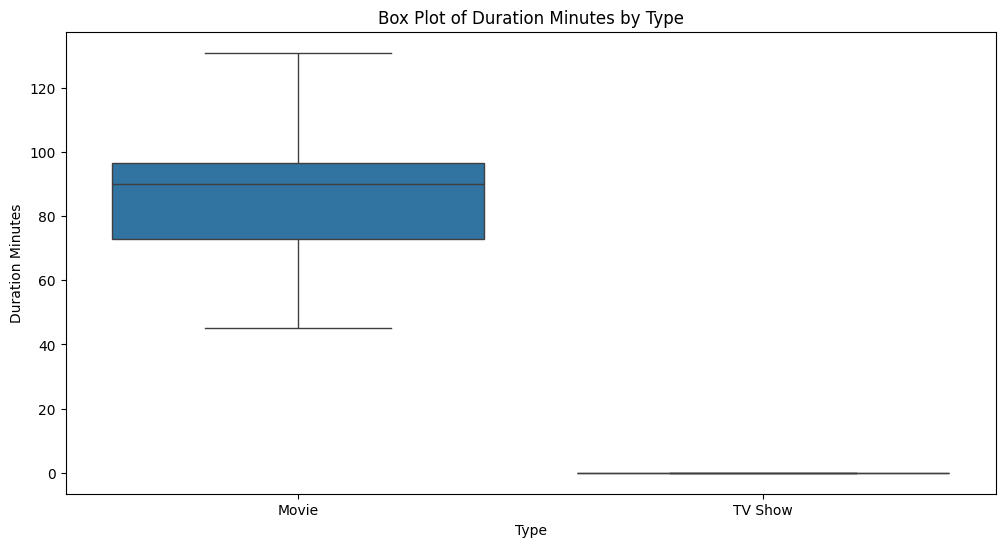

In [ ]:
# Box plot for duration in minutes
plt.figure(figsize=(12, 6))
sns.boxplot(data=amazon_prime_data, x='type', y='duration_minutes')
plt.title('Box Plot of Duration Minutes by Type')
plt.xlabel('Type')
plt.ylabel('Duration Minutes')
plt.show()


# Clustering

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Silhouette Score: 0.6234332313580933


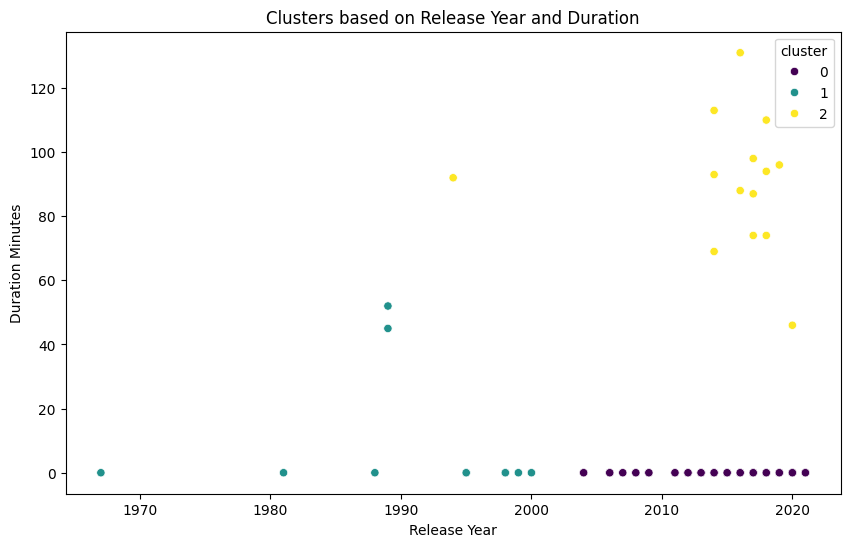

Cluster Centers:
   release_year  duration_minutes  duration_seasons  cluster
0   2017.765625     -5.329071e-15      3.117188e+00        1
1   1991.692308      7.461538e+00      2.153846e+00        2
2   2015.142857      9.035714e+01     -8.881784e-16        3


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Select numerical columns for clustering
numeric_cols = ['release_year', 'duration_minutes', 'duration_seasons']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(amazon_prime_data[numeric_cols])

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
amazon_prime_data['cluster'] = kmeans.fit_predict(scaled_data)

# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_data, amazon_prime_data['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=amazon_prime_data, x='release_year', y='duration_minutes', hue='cluster', palette='viridis')
plt.title('Clusters based on Release Year and Duration')
plt.xlabel('Release Year')
plt.ylabel('Duration Minutes')
plt.show()

# Cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=numeric_cols)
cluster_centers_df['cluster'] = range(1, len(cluster_centers) + 1)
print("Cluster Centers:")
print(cluster_centers_df)


# Association Rule Mining

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Prepare the data for association rule mining
# For simplicity, we'll create a binary matrix for selected columns
binary_matrix = pd.get_dummies(amazon_prime_data[['type', 'rating']])

# Apply the Apriori algorithm
frequent_itemsets = apriori(binary_matrix, min_support=0.1, use_colnames=True)

# Generate the association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


    antecedents     consequents   support  confidence      lift
0  (rating_13+)  (type_TV Show)  0.122581        0.95  1.059353
1  (rating_ALL)  (type_TV Show)  0.225806        1.00  1.115108


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Analysing the Description column with word cloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


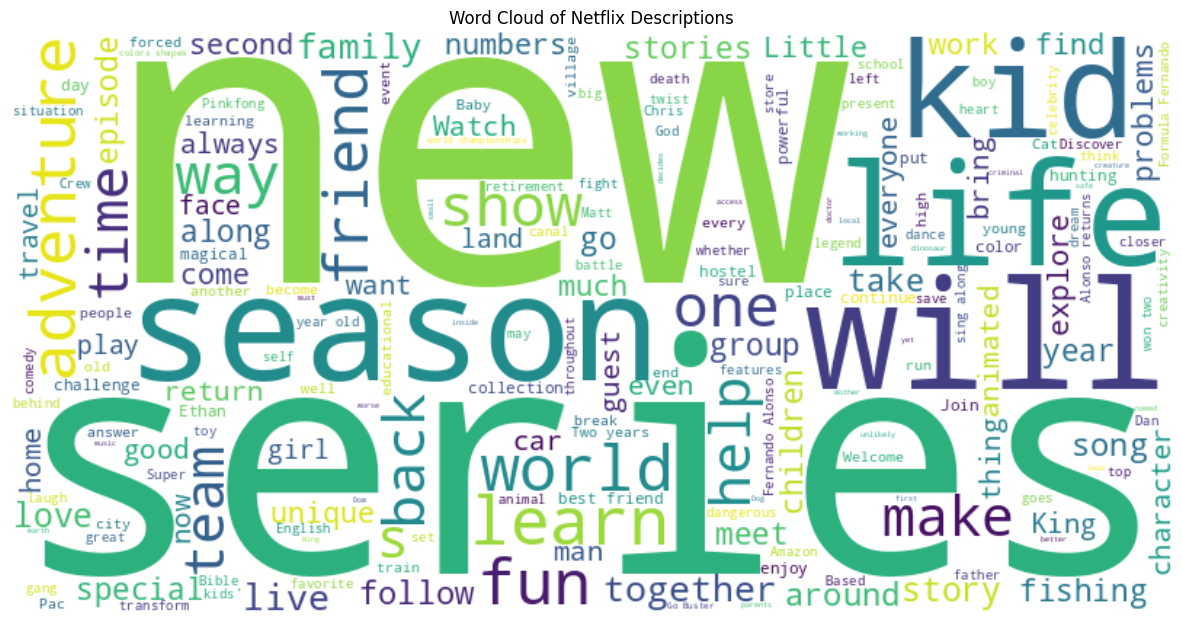

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all descriptions into a single string
text = ' '.join(amazon_prime_data['description'].dropna().tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Descriptions')
plt.show()